In [33]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pokemon-challenge/tests.csv
/kaggle/input/pokemon-challenge/combats.csv
/kaggle/input/pokemon-challenge/pokemon.csv


In [2]:
data = pd.read_csv('../input/pokemon-challenge/pokemon.csv')

In [3]:
data.info() #Veri setinin içeriği hakkında biraz ön bilgi kazanalım.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


Buradan yola çıkarak veri setinde 12 tane kolon olduğunu bunlardan 8 tanesinin integer, 3 tanesinin object ve 1 tanesinin de boolean değişken olduğunu söyleyebiliriz.

In [4]:
data.count() # Veri setinde kaç adet gözlem ve değişken olduğunu yazdıralım.

#             800
Name          799
Type 1        800
Type 2        414
HP            800
Attack        800
Defense       800
Sp. Atk       800
Sp. Def       800
Speed         800
Generation    800
Legendary     800
dtype: int64

Name ve Type 2 isimli kolonlarda nan değerler olduğunu gözlemleyebiliriz. Bu kolonlarla çalışma yapmamız gerekirse nan değerler bize sorun yaratabilir, bu yüzden bu değerleri düzeltmemiz gerekebilir.

In [5]:
data.isna().sum() #Eksik gözlemlerin kaç tane olduğuna bakalım.

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Name değişkeninde 1, Type 2 değişkeninde 386 nan değer olduğu gözükür. Diğer değişkenlerde nan değer yoktur.

In [6]:
data.head() #Veri setinin ilk 5 gözlemini görüntüleyelim.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [7]:
data.tail() #Veri setinin son 5 gözlemini görüntüleyelim.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [8]:
data.sample(10) #Veri setinden restgele 10 gözlem görüntüleyelim.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
694,695,Deino,Dark,Dragon,52,65,50,45,50,38,5,False
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
755,756,Slurpuff,Fairy,NaN,82,80,86,85,75,72,6,False
516,517,Tangrowth,Grass,NaN,100,100,125,110,50,50,4,False
243,244,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
218,219,Girafarig,Normal,Psychic,70,80,65,90,65,85,2,False
534,535,Frost Rotom,Electric,Ice,50,65,107,105,107,86,4,False
635,636,Gothita,Psychic,NaN,45,30,50,55,65,45,5,False
69,70,Kadabra,Psychic,NaN,40,35,30,120,70,105,1,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,1,False


Kod satırını her run edişimizde farklı sonuçlar gözlemleriz.

In [9]:
data["Type 1"].sort_values().unique() #Type 1 kolonunun benzersiz değerlerini görüntüleyelim ve sıralayalım.


array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'], dtype=object)

In [10]:
data["Type 2"].sort_values().unique() #Type 2 kolonunun benzersiz değerlerini görüntüleyelim ve sıralayalım.

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water', nan], dtype=object)

 Type 1 ve Type 2 kolonlarını incelediğimizde bu iki kolonun içerdiği benzersiz değerlerin aynı olduğunu gözlemleyebilriz. Type 2 kolonunda girilmemiş değerler olduğundan Type 1 kolonundan farklı olarak nan değeri de bulunur.

In [11]:
data.describe().T #Sadece sayısal verileri açıklar.

,count,mean,std,min,25%,50%,75%,max
#,800.0,400.50000,231.084400,1.0,200.75,400.5,600.25,800.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


Veri setinin istatiklerine biraz göz gezdirirsek standart sapmalarının yüksek olduğunu ve minimum, maksimum açıklığının yüksek olduğunu söyleyebiliriz.

Üzerlerinde daha rahat çalışabilmek için kolon isimlerini düzenleyelim.

In [12]:
data = data.rename(columns = {"Type 1":"Type1","Type 2":"Type2","Sp. Atk":"SpAtk","Sp. Def":"SpDef"})
data

,#,Name,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


Veri setimizin korelasyonunu inceleyelim.

In [30]:
corr = data.corr()
corr

,#,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
SpAtk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
SpDef,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


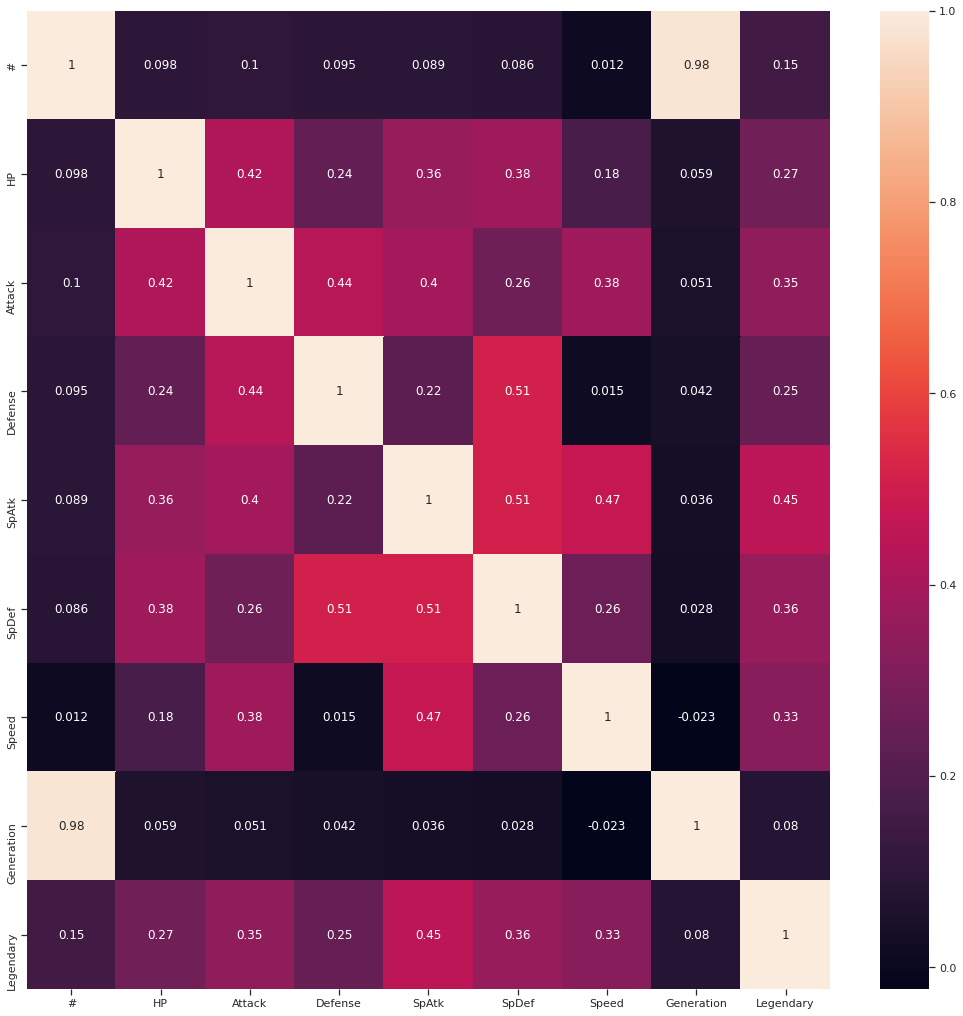

In [40]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

Isı haritasını incelediğimizde SpDef değeri yüksek olan pokemonların Defense ve SpAtk değerlerinin de yüksek olduğunu görürüz. Yani SpDef değeriyle Defense değeri arasında güçlü ve pozitif bir ilişki vardır. Aynı zamanda SpDef değeriyle SpAtk değeri arasında da güçlü ve pozitif bir ilişki bulunmaktadır.

Grafikler yardımıyla Defense-SpDef ve SpDef-SpAtk değerleri arasındaki ilişkiyi inceleyelim.

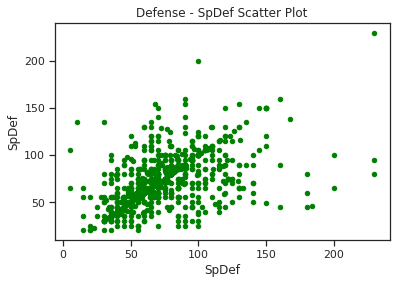

In [51]:
data.plot(kind="scatter", x="Defense", y="SpDef", color="green")
plt.xlabel("Defense")
plt.xlabel("SpDef")
plt.title("Defense - SpDef Scatter Plot")
plt.show()

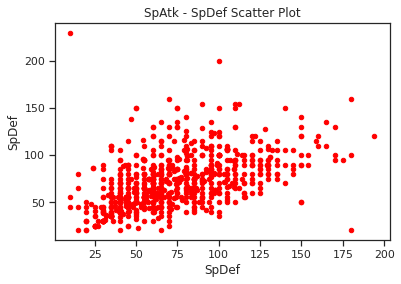

In [50]:
data.plot(kind="scatter", x="SpAtk", y="SpDef",color="red")
plt.xlabel("SpAtk")
plt.xlabel("SpDef")
plt.title("SpAtk - SpDef Scatter Plot")
plt.show()

In [13]:
data.groupby(["Type1"]).describe()["Attack"].sort_values('mean',ascending=False) #Pokemonların tiplerine göre ortalama attack değerlerini sıralayalım.

,count,mean,std,min,25%,50%,75%,max
Type1,,,,,,,,
Dragon,32.0,112.125000,33.742622,50.0,86.25,113.5,134.25,180.0
Fighting,27.0,96.777778,28.290163,35.0,80.00,100.0,120.00,145.0
Ground,32.0,95.750000,33.059087,40.0,72.00,85.0,121.00,180.0
Rock,44.0,92.863636,35.325458,40.0,59.75,95.0,120.25,165.0
Steel,27.0,92.703704,30.388276,24.0,77.50,89.0,110.00,150.0
Dark,31.0,88.387097,25.774247,50.0,65.00,88.0,100.00,150.0
Fire,52.0,84.769231,28.769275,30.0,62.25,84.5,101.00,160.0
Flying,4.0,78.750000,37.500000,30.0,60.00,85.0,103.75,115.0
Poison,28.0,74.678571,19.630010,43.0,60.00,74.0,90.50,106.0


In [14]:
data.groupby(["Type1"]).describe()["Defense"].sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Type1,,,,,,,,
Steel,27.0,126.370370,44.806548,50.0,97.50,120.0,150.00,230.0
Rock,44.0,100.795455,36.447209,40.0,71.50,100.0,120.50,200.0
Dragon,32.0,86.375000,24.102938,35.0,68.75,90.0,100.00,130.0
Ground,32.0,84.843750,33.786912,25.0,53.75,84.5,110.00,160.0
Ghost,32.0,81.187500,32.551138,30.0,60.00,72.5,111.00,145.0
Water,112.0,72.946429,27.773809,20.0,54.50,70.0,88.50,180.0
Ice,24.0,71.416667,34.387708,15.0,48.75,75.0,85.00,184.0
Grass,70.0,70.800000,24.485192,30.0,50.00,66.0,84.50,131.0
Bug,69.0,70.724638,33.617609,30.0,50.00,60.0,90.00,230.0


In [15]:
data.groupby(["Type1"]).describe()["HP"].sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Type1,,,,,,,,
Dragon,32.0,83.312500,23.795415,41.0,67.50,80.0,101.25,125.0
Normal,98.0,77.275510,36.233430,30.0,55.00,70.0,90.00,255.0
Fairy,17.0,74.117647,23.587291,35.0,55.00,78.0,90.00,126.0
Ground,32.0,73.781250,25.662492,10.0,56.75,75.0,91.25,115.0
Water,112.0,72.062500,27.487026,20.0,52.25,70.0,90.25,170.0
Ice,24.0,72.000000,21.286861,36.0,54.00,70.0,90.00,110.0
Flying,4.0,70.750000,20.694202,40.0,69.25,79.0,80.50,85.0
Psychic,57.0,70.631579,28.421340,20.0,50.00,68.0,80.00,190.0
Fire,52.0,69.903846,19.404123,38.0,58.00,70.0,80.00,115.0


In [16]:
data[(data["Type1"] == "Dragon")] #Dragon tipindeki pokemonları gözlemleyelim.

,#,Name,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
159,160,Dratini,Dragon,NaN,41,64,45,50,50,50,1,False
160,161,Dragonair,Dragon,NaN,61,84,65,70,70,70,1,False
161,162,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,False
365,366,Altaria,Dragon,Flying,75,70,90,70,105,80,3,False
366,367,Mega Altaria,Dragon,Fairy,75,110,110,110,105,80,3,False
406,407,Bagon,Dragon,NaN,45,75,60,40,30,50,3,False
407,408,Shelgon,Dragon,NaN,65,95,100,60,50,50,3,False
408,409,Salamence,Dragon,Flying,95,135,80,110,80,100,3,False
409,410,Mega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False
417,418,Latias,Dragon,Psychic,80,80,90,110,130,110,3,True


In [17]:
data[(data["Type1"] == "Fairy")] #Fairy tipindeki pokemonları gözlemleyelim.

,#,Name,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
40,41,Clefairy,Fairy,NaN,70,45,48,60,65,35,1,False
41,42,Clefable,Fairy,NaN,95,70,73,95,90,60,1,False
187,188,Cleffa,Fairy,NaN,50,25,28,45,55,15,2,False
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False
190,191,Togetic,Fairy,Flying,55,40,85,80,105,40,2,False
225,226,Snubbull,Fairy,NaN,60,80,50,40,40,30,2,False
226,227,Granbull,Fairy,NaN,90,120,75,60,60,45,2,False
519,520,Togekiss,Fairy,Flying,85,50,95,120,115,80,4,False
737,738,Flabébé,Fairy,NaN,44,38,39,61,79,42,6,False
738,739,Floette,Fairy,NaN,54,45,47,75,98,52,6,False


In [18]:
#Veri setiyle daha kolay uğraşabilmek için biraz küçültelim ve 6 tip pokemon üzerinden ilerleyelim.
dragon = data[(data["Type1"] == "Dragon")]
rock = data[(data["Type1"] == "Rock")]
fire = data[(data["Type1"] == "Fire")]
water = data[(data["Type1"] == "Water")]
grass = data[(data["Type1"] == "Grass")]            
fairy = data[(data["Type1"] == "Fairy")]

Veri setini seaborn ve matplot kütüphanelerinden yardım alarak görselleştirelim.

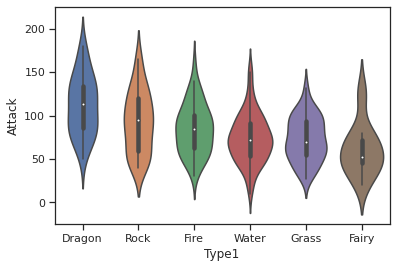

In [20]:
smallData = pd.concat([dragon,rock,fire,water,grass,fairy])
sns.violinplot(x = "Type1", y = "Attack", data = smallData);

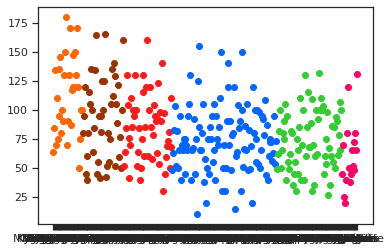

In [21]:
plt.scatter(dragon.Name, dragon.Attack, color="#ff6600", label="Dragon" )
plt.scatter(rock.Name, rock.Attack, color="#993300", label="Rock" )
plt.scatter(fire.Name, fire.Attack, color="#ff1a1a", label="Fire" )
plt.scatter(water.Name, water.Attack, color="#0066ff", label="Water" )
plt.scatter(grass.Name, grass.Attack, color="#33cc33", label="Grass" )
plt.scatter(fairy.Name, fairy.Attack, color="#ff0066", label="Fairy")



Görselleştirdiğimiz verileri incelersek dragon tipi pokemonların attack değerindeki yüksekliği daha iyi anlayabiliriz.

Veri setindeki en güçlü pokemon türünü bulmaya çalışalım. Bulma yollarından biri pokemon tür niceliklerinin ortalamanın ne kadar altında veya üstünde olduğuna bakmak olabilir.

In [22]:
dicts={}
smallData2 = smallData.loc[:,"HP":"Speed"]
liste=list()
for each in smallData2.columns:
    smallData.groupby(["Type1"])[each].mean()
    for i in range(6):
        liste.append(smallData.groupby(["Type1"])[each].describe().iloc[i,1]-smallData2.describe().iloc[1,i])
    dicts[each] = liste.copy()
    liste.clear()
    

Oluşturacağımız yeni veri setinde pokemon özelliklerinin ortalamadan farklarını tutalım.

In [23]:
typeMean=pd.DataFrame(dicts)
typeMean.index=smallData.Type1.sort_values().unique().copy()
typeMean

,HP,Attack,Defense,SpAtk,SpDef,Speed
Dragon,12.312500,41.125000,15.375000,25.843750,17.843750,12.031250
Fairy,-7.099478,-19.687714,-15.511243,-2.687714,3.488757,-32.628890
Fire,-6.444778,8.420607,-8.579393,12.632145,-4.137085,-1.906316
Grass,-11.175055,-5.232197,-7.646483,-0.946483,-8.017912,-16.517912
Rock,-8.602724,18.897276,26.829094,-10.625452,1.510912,-18.057270
Water,6.200115,8.289400,7.084043,8.950115,4.655472,0.101900


In [24]:
typeMean = typeMean.T.describe()
typeMean

,Dragon,Fairy,Fire,Grass,Rock,Water
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,20.755208,-12.354380,-0.002470,-8.256007,1.658639,5.880174
std,11.185988,13.014321,8.560004,5.287356,17.751934,3.214620
min,12.031250,-32.628890,-8.579393,-16.517912,-18.057270,0.101900
25%,13.078125,-18.643596,-5.867855,-10.385769,-10.119770,5.041633
50%,16.609375,-11.305361,-3.021701,-7.832197,-3.545906,6.642079
75%,23.843750,-3.790655,5.838876,-5.835769,14.550685,7.988061
max,41.125000,3.488757,12.632145,-0.946483,26.829094,8.950115


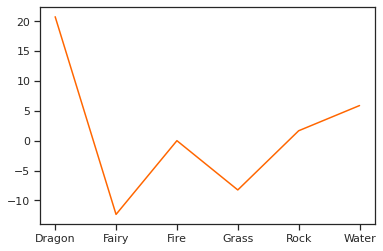

In [25]:
plt.plot(typeMean.columns, typeMean.iloc[1,:], color="#ff6600", label="Dragon" )


Bu verilere ve grafiğe bakıldığında; dragon tipi pokemonların incelediğimiz diğer pokemonlara karşı daha güçlü olduğunu söyleyebiliriz.